In [51]:
# Let's begin by loading the uploaded file to examine its structure and understand the data.
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load the data from the provided CSV file
file_path = 'car_price_prediction.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

(         ID  Price  Levy Manufacturer    Model  Prod. year   Category  \
 0  45654403  13328  1399        LEXUS   RX 450        2010       Jeep   
 1  44731507  16621  1018    CHEVROLET  Equinox        2011       Jeep   
 2  45774419   8467     -        HONDA      FIT        2006  Hatchback   
 3  45769185   3607   862         FORD   Escape        2011       Jeep   
 4  45809263  11726   446        HONDA      FIT        2014  Hatchback   
 
   Leather interior Fuel type Engine volume    Mileage  Cylinders  \
 0              Yes    Hybrid           3.5  186005 km        6.0   
 1               No    Petrol             3  192000 km        6.0   
 2               No    Petrol           1.3  200000 km        4.0   
 3              Yes    Hybrid           2.5  168966 km        4.0   
 4              Yes    Petrol           1.3   91901 km        4.0   
 
   Gear box type Drive wheels   Doors             Wheel   Color  Airbags  
 0     Automatic          4x4  04-May        Left wheel  Silver

In [52]:
categorical_cols = ['Manufacturer', 'Model', 'Category', 'Leather interior', 
                    'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel', 'Color']
unique_values_dict = {}
for col in categorical_cols:
    unique_values_dict[col] = df[col].unique()
unique_values_dict

{'Manufacturer': array(['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'HYUNDAI', 'TOYOTA',
        'MERCEDES-BENZ', 'OPEL', 'PORSCHE', 'BMW', 'JEEP', 'VOLKSWAGEN',
        'AUDI', 'RENAULT', 'NISSAN', 'SUBARU', 'DAEWOO', 'KIA',
        'MITSUBISHI', 'SSANGYONG', 'MAZDA', 'GMC', 'FIAT', 'INFINITI',
        'ALFA ROMEO', 'SUZUKI', 'ACURA', 'LINCOLN', 'VAZ', 'GAZ',
        'CITROEN', 'LAND ROVER', 'MINI', 'DODGE', 'CHRYSLER', 'JAGUAR',
        'ISUZU', 'SKODA', 'DAIHATSU', 'BUICK', 'TESLA', 'CADILLAC',
        'PEUGEOT', 'BENTLEY', 'VOLVO', 'სხვა', 'HAVAL', 'HUMMER', 'SCION',
        'UAZ', 'MERCURY', 'ZAZ', 'ROVER', 'SEAT', 'LANCIA', 'MOSKVICH',
        'MASERATI', 'FERRARI', 'SAAB', 'LAMBORGHINI', 'ROLLS-ROYCE',
        'PONTIAC', 'SATURN', 'ASTON MARTIN', 'GREATWALL'], dtype=object),
 'Model': array(['RX 450', 'Equinox', 'FIT', ..., 'E 230 124', 'RX 450 F SPORT',
        'Prius C aqua'], dtype=object),
 'Category': array(['Jeep', 'Hatchback', 'Sedan', 'Microbus', 'Goods wagon',
        'Unive

# Preprocess data

In [53]:
# Deduplicate rows
df = df.drop_duplicates()

# Convert Levi to int and replace "-" with 0
df['Levy'] = df['Levy'].replace('-', 0)

# Convert 'Mileage' from string to numeric
df['Mileage'] = df['Mileage'].str.replace(' km', '').str.replace(',', '').astype(float)

# Label Encode 'Engine volume'
label_encoder = LabelEncoder()
df['Engine volume'] = label_encoder.fit_transform(df['Engine volume'])

# Correct data inconsistencies in 'Doors'
# Normalize 'Doors' column values like '>5'
df['Doors'] = df['Doors'].replace('04-May', '4-5').replace('>5', '5').str.split('-').apply(lambda x: int(x[0]))

# Convert 'Prod. year' to 'Car Age'
current_year = pd.Timestamp.now().year
df['Car Age'] = current_year - df['Prod. year']
df = df.drop('Prod. year', axis=1)

# Convert categorical columns to dummy variables
categorical_cols = ['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type', 
                    'Gear box type', 'Drive wheels', 'Wheel', 'Color']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df.head()

,ID,Price,Levy,Engine volume,Mileage,Cylinders,Doors,Airbags,Car Age,Manufacturer_ALFA ROMEO,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,45654403,13328,1399,63,186005.0,6.0,4,12,14,False,...,False,False,False,False,False,False,True,False,False,False
1,44731507,16621,1018,56,192000.0,6.0,4,8,13,False,...,False,False,False,False,False,False,False,False,False,False
2,45774419,8467,0,22,200000.0,4.0,4,2,18,False,...,False,False,False,False,False,False,False,False,False,False
3,45769185,3607,862,46,168966.0,4.0,4,0,13,False,...,False,False,False,False,False,False,False,False,True,False
4,45809263,11726,446,22,91901.0,4.0,4,4,10,False,...,False,False,False,False,False,False,True,False,False,False


In [54]:
# Splitting the data for machine learning
X = df.drop(['Price', 'ID'], axis=1)  # Drop target and ID columns
y = df['Price']

# Remove outlier due to erroneous input
df = df[df['ID'] != 45812886]

# Remove cars with price <$500 because that is not realistic 
df = df[df['Price'] >= 500]


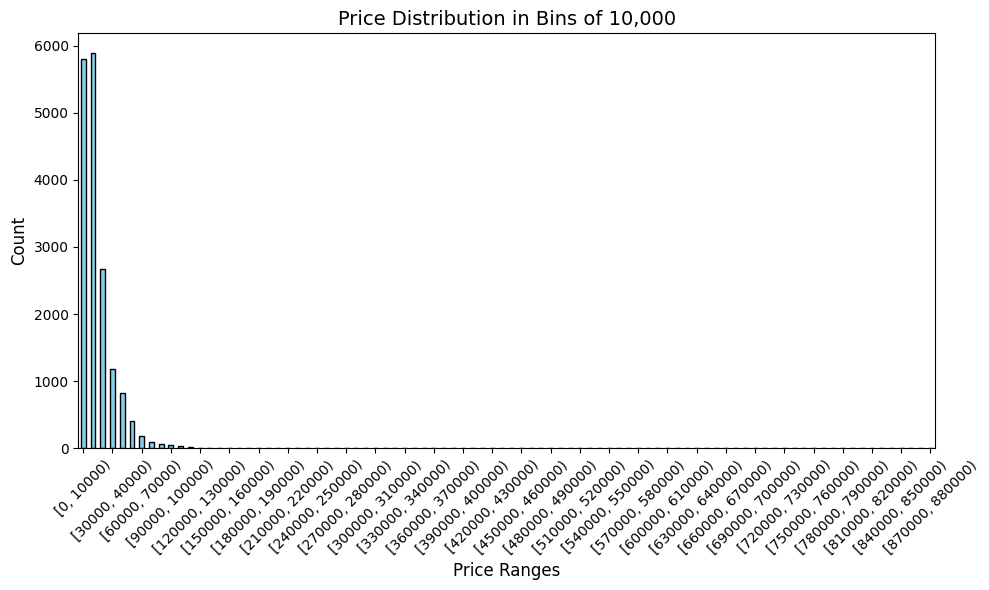

In [55]:

# Create bins of 10,000 and add a new column for the bins
bin_edges = range(0, int(df['Price'].max()) + 10000, 10000)
df['Price_Bin'] = pd.cut(df['Price'], bins=bin_edges, right=False)

# Count the occurrences in each bin
bin_counts = df['Price_Bin'].value_counts(sort=False)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
bin_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Customize the x-axis ticks to show every 3rd label
plt.xlabel('Price Ranges', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Price Distribution in Bins of 10,000', fontsize=14)
plt.xticks(ticks=range(len(bin_counts))[::3],  # Select every 3rd tick
           labels=[str(bin) for bin in bin_counts.index][::3], rotation=45)

# Show the plot
plt.tight_layout()
plt.show()
del df['Price_Bin']


In [56]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# Save preprocessed data for reuse
X_train.to_csv('X_train_preprocessed.csv', index=False)
X_test.to_csv('X_test_preprocessed.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

# Model

In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

## Baseline

In [ ]:
average_price = round(float(df["Price"].mean()), 2)
baseline_pred = np.array([average_price for _ in range(len(y_test))])
mse_baseline = mean_squared_error(y_test, baseline_pred)
mse_baseline

18798.29

np.float64(348612646.8315822)

## Model 2

In [75]:


# Initialize the model (Random Forest Regressor)
model = RandomForestRegressor(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("MSE on training set:", mse_train)
print("MSE on test set:", mse_test)

MSE on training set: 9727151279.468142
MSE on test set: 49524700638.778755
